In [31]:
import os 
import sys

import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
PATH = os.getcwd() + '/speech_commands_v0.01/'

In [15]:
def get_directory_contents(path):
    return os.listdir(path)

def open_file(filename):
    
    f = open(filename)
    return f.read().splitlines()

def compile_dataset(folders):
    
    total_words = []
    for folder in folders:
        words = get_directory_contents(path=PATH+folder)
        words = [folder+'/'+word for word in words]
        total_words = total_words + words
    
    dataset = create_df(words=total_words)
                           
    return dataset

def create_df(words):
    
    data = pd.DataFrame({'recordings':words})

    data['word'] = data['recordings'].str.split('/').str[0]
    data['speaker_id'] = data['recordings'].str.split('/').str[1]
    data['speaker_id'] =data['speaker_id'].str.split('_').str[0]
    
    return data

def summary(data):
    
    summary_df = pd.DataFrame()
    summary_df['total_recordings'] = [data.shape[0]]
    summary_df['total_speakers'] = len(data['speaker_id'].unique())
    summary_df['total_words'] = len(data['word'].unique())
    
    return summary_df

def word_distribution():
    
    word_count = data['word'].value_counts()
    ax = word_count.plot(kind='bar', figsize=(8,4), alpha=0.5)
    plt.show()

In [4]:
remove_words = [
    '.DS_Store', 'validation_list.txt', 'LICENSE',
    '_background_noise_', 'README.md', 'testing_list.txt'
]

names = get_directory_contents(path=PATH)
names = [word for word in names if word not in remove_words]
print("Number of Recordings:", len(names))
print("Recordings:", names)

Number of Recordings: 30
Recordings: ['right', 'eight', 'cat', 'tree', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'nine', 'left', 'stop', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'off', 'four']


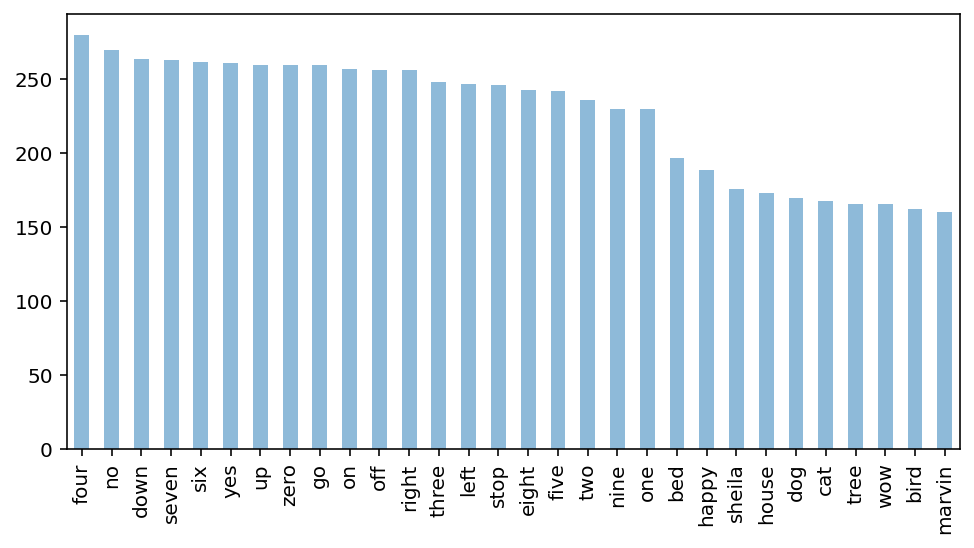

,total_recordings,total_speakers,total_words
0,6798,189,30


In [5]:
val_list = open_file(filename=PATH+'validation_list.txt')

val_df = create_df(words=val_list)
val_summary = summary(data=val_df)
word_distribution(data=val_df)
val_summary

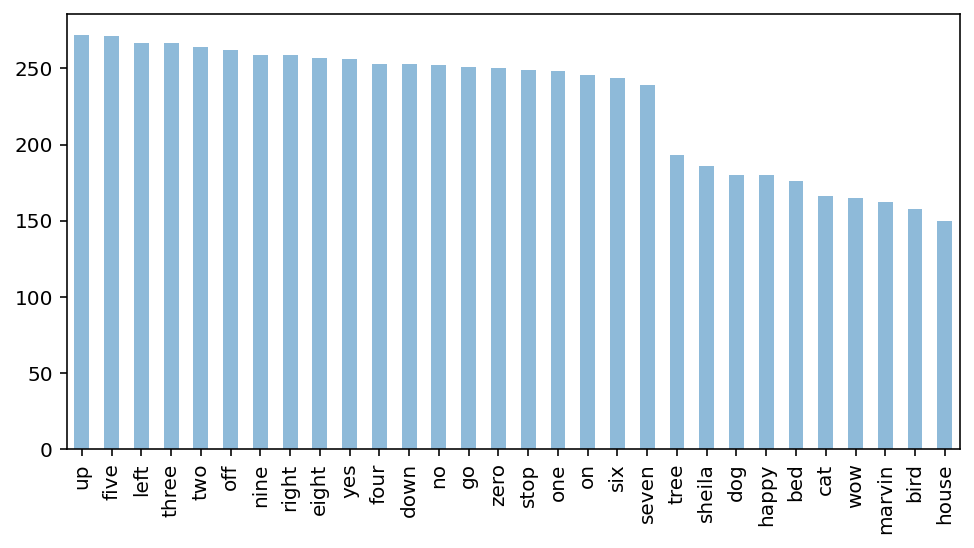

,total_recordings,total_speakers,total_words
0,6835,189,30


In [6]:
test_list = open_file(filename=PATH+'testing_list.txt')

test_df = create_df(words=test_list)
test_summary = summary(data=test_df)
word_distribution(data=test_df)
test_summary

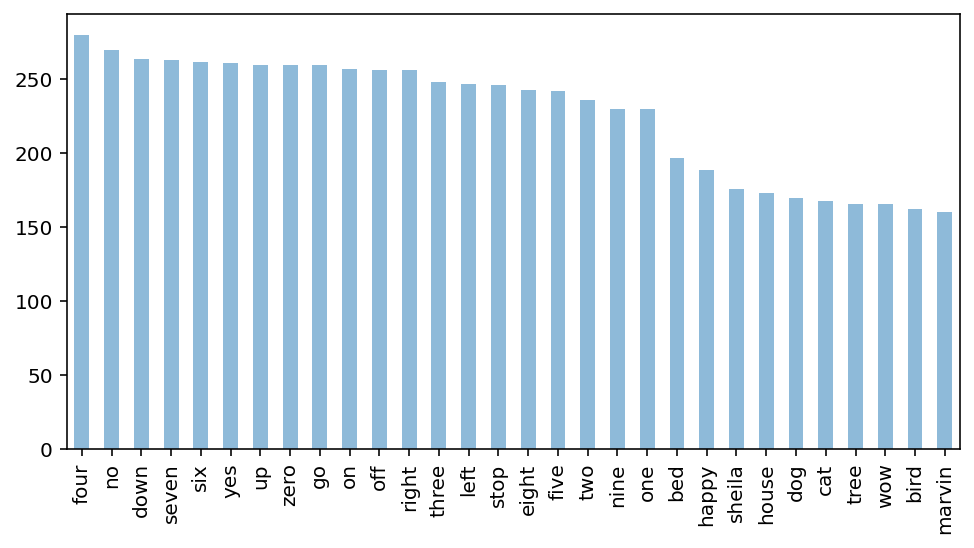

,total_recordings,total_speakers,total_words
0,64721,1881,30


In [19]:
total_df = compile_dataset(folders=names)
training_df = total_df[~total_df['recordings'].isin(val_df['recordings'])]
training_df = training_df[~training_df['recordings'].isin(test_df['recordings'])]
training_summary = summary(data=training_df)

In [32]:
total_df['set'] = 'train'
cond = total_df['recordings'].isin(val_df['recordings'])
total_df['set'] = np.where(cond, 'validation', total_df['set'])
cond = total_df['recordings'].isin(test_df['recordings'])
total_df['set'] = np.where(cond, 'test', total_df['set'])

In [82]:
groupby_summary = total_df.groupby(by=['word', 'set'], as_index=False)['recordings'].count()
overall_count = total_df.groupby(by='word', as_index=False)['recordings'].count()
overall_count.rename(columns={'recordings':'total'}, inplace=True)
groupby_summary = groupby_summary.merge(overall_count, how='left', on='word')

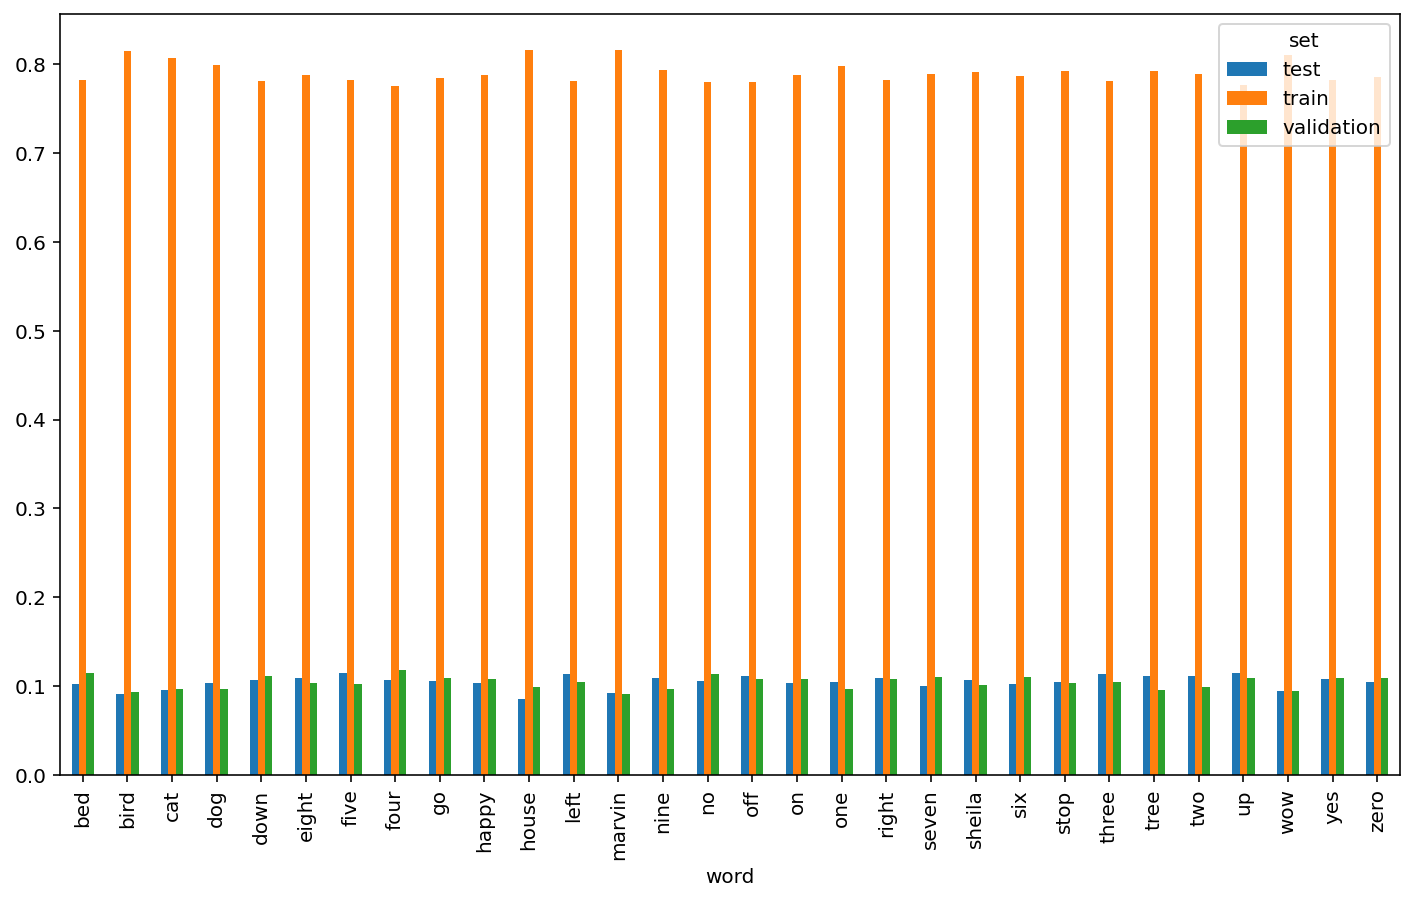

In [71]:
groupby_summary.pivot(index='word', columns='set', values='%_of_recordings').plot(kind='bar', figsize=(12,7))
plt.show()

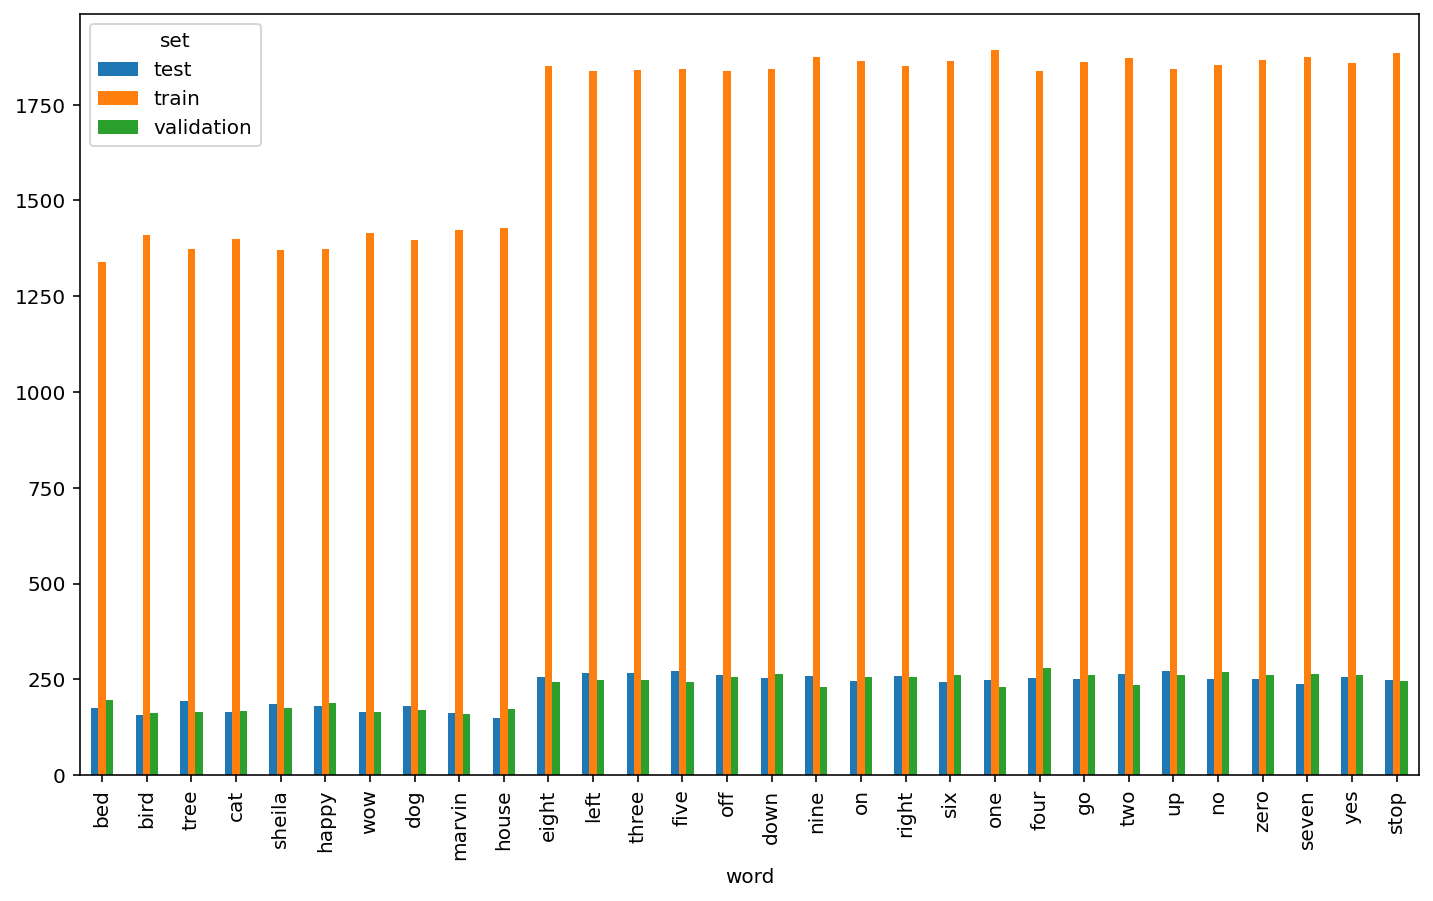

In [81]:
pivot['recordings'].plot(kind='bar', figsize=(12,7))
plt.show()